# INTRODUCTION

###### 
 Retail Product Performance Analysis

This project focuses on analyzing retail transaction data to extract meaningful business insights. The dataset contains records of customer purchases, including product details, order dates, quantities, regions, and pricing.

The goal is to simulate the daily responsibilities of a data analyst working in a retail company — performing cleaning, feature engineering, and answering business questions using Python and Pandas. Visualizations are used to support key insights.

We divided the project into 3 phases:
1. Data Cleaning & Preparation
2. Analytical Insights (with groupby, logic, etc.)
3. Visualizations for key business questions

The results help stakeholders understand which products, time periods, and regions drive performance — supporting better decision-making.


## Phase#1-Data Cleaning & Preparation

### 1.1-Load Dataset

In [1]:
import pandas as pd
df=pd.read_csv('retail_sales_data_large.csv')
df.head()

,Order ID,Product,Category,Quantity Ordered,Price Each,Order Date,Region
0,1001,Laptop,Electronics,1,1200,2023-01-15,West
1,1002,Phone,Electronics,2,700,2023-01-16,East
2,1003,Tablet,Electronics,1,300,2023-01-17,West
3,1004,Monitor,Electronics,3,250,2023-01-18,South
4,1001,Laptop,Electronics,1,1200,2023-01-15,West


### 1.2-Basic Exploration

In [ ]:
print(df.shape)
print(df.columns)


(9000, 7)
Index(['Order ID', 'Product', 'Category', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Region'],
      dtype='object')
Order ID             int64
Product             object
Category            object
Quantity Ordered     int64
Price Each           int64
Order Date          object
Region              object
dtype: object


### 1.3-Checking Columns and dataTypes

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9000 non-null   int64 
 1   Product           9000 non-null   object
 2   Category          9000 non-null   object
 3   Quantity Ordered  9000 non-null   int64 
 4   Price Each        9000 non-null   int64 
 5   Order Date        9000 non-null   object
 6   Region            9000 non-null   object
dtypes: int64(3), object(4)
memory usage: 492.3+ KB
None


### 1.4-Statistical Summary

In [5]:
print(df.describe(include='all'))

           Order ID Product     Category  Quantity Ordered   Price Each  \
count   9000.000000    9000         9000       9000.000000  9000.000000   
unique          NaN       4            1               NaN          NaN   
top             NaN  Laptop  Electronics               NaN          NaN   
freq            NaN    2250         9000               NaN          NaN   
mean    1002.500000     NaN          NaN          1.750000   612.500000   
std        1.118096     NaN          NaN          0.829202   381.424848   
min     1001.000000     NaN          NaN          1.000000   250.000000   
25%     1001.750000     NaN          NaN          1.000000   287.500000   
50%     1002.500000     NaN          NaN          1.500000   500.000000   
75%     1003.250000     NaN          NaN          2.250000   825.000000   
max     1004.000000     NaN          NaN          3.000000  1200.000000   

        Order Date Region  
count         9000   9000  
unique           4      3  
top     2023-01

### 1.5-Check Missing Values

In [6]:
print(df.isnull().sum())

Order ID            0
Product             0
Category            0
Quantity Ordered    0
Price Each          0
Order Date          0
Region              0
dtype: int64


## Phase 2 – Core Analysis & Trend

### 2.1-Add Time Features

In [7]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Month_Added']=df['Order Date'].dt.month
df['Year_Added']=df['Order Date'].dt.year
df['Weekday_Added']=df['Order Date'].dt.weekday
df[['Order Date', 'Month_Added', 'Year_Added', 'Weekday_Added']].head()

,Order Date,Month_Added,Year_Added,Weekday_Added
0,2023-01-15,1,2023,6
1,2023-01-16,1,2023,0
2,2023-01-17,1,2023,1
3,2023-01-18,1,2023,2
4,2023-01-15,1,2023,6


In [11]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()


,Order ID,Product,Category,Quantity Ordered,Price Each,Order Date,Region,Month_Added,Year_Added,Weekday_Added,Sales
0,1001,Laptop,Electronics,1,1200,2023-01-15,West,1,2023,6,1200
1,1002,Phone,Electronics,2,700,2023-01-16,East,1,2023,0,1400
2,1003,Tablet,Electronics,1,300,2023-01-17,West,1,2023,1,300
3,1004,Monitor,Electronics,3,250,2023-01-18,South,1,2023,2,750
4,1001,Laptop,Electronics,1,1200,2023-01-15,West,1,2023,6,1200


### Q1: Which product generated is the highest total sales?

In [12]:
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print(top_products)

Product
Phone      3150000
Laptop     2700000
Monitor    1687500
Tablet      675000
Name: Sales, dtype: int64


### Q2: Which category is the most profitable?

In [13]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)


Category
Electronics    8212500
Name: Sales, dtype: int64


###  Q3: What is the sales trend month-wise?

In [16]:
monthly_sales = df.groupby('Month_Added')['Sales'].sum()
print(monthly_sales)

Month_Added
1    8212500
Name: Sales, dtype: int64


### Q4: Which region drives the most revenue?

In [17]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)


Region
West     3375000
East     3150000
South    1687500
Name: Sales, dtype: int64


### Q5: Which weekday has the highest number of orders?

In [19]:
weekday_orders = df['Weekday_Added'].value_counts()
print(weekday_orders)


Weekday_Added
6    2250
0    2250
1    2250
2    2250
Name: count, dtype: int64


### Q6: What is the average quantity ordered per category?

In [20]:
avg_quantity = df.groupby('Category')['Quantity Ordered'].mean().sort_values(ascending=False)
print(avg_quantity)


Category
Electronics    1.75
Name: Quantity Ordered, dtype: float64


##  Phase 3 – Analytical Insights with Visualizations

### Q1: Which product generated the highest total sales?

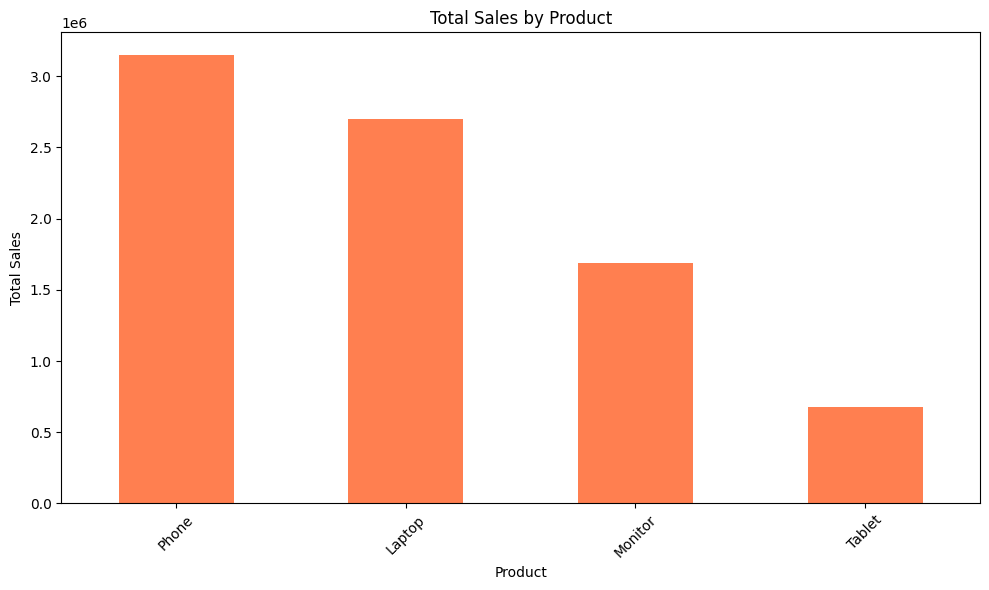

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color='coral')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Q2: Which category had the highest average price?

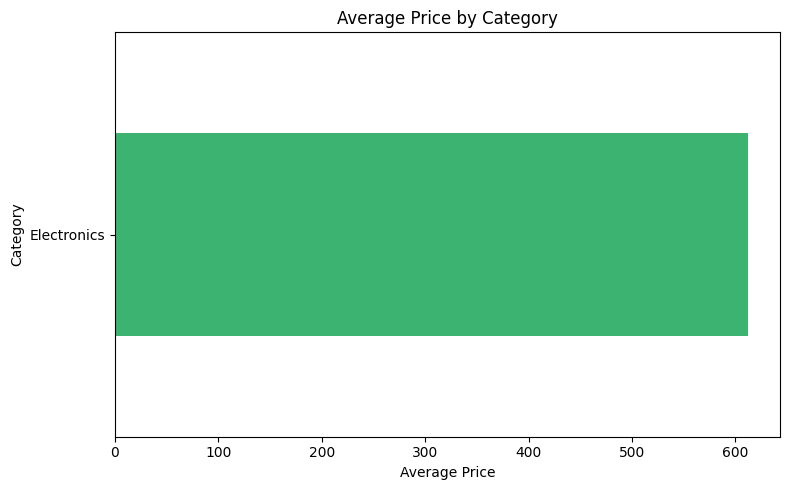

In [23]:
avg_price = df.groupby('Category')['Price Each'].mean().sort_values(ascending=True)

plt.figure(figsize=(8,5))
avg_price.plot(kind='barh', color='mediumseagreen')
plt.title('Average Price by Category')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


###  Q3: Which month had the highest revenue?

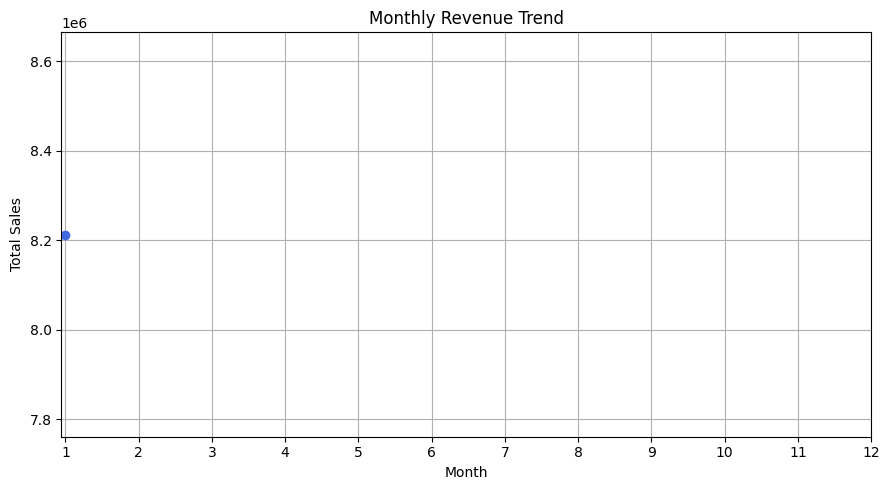

In [28]:
monthly_sales = df.groupby('Month_Added')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
monthly_sales.plot(marker='o', color='royalblue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


### Q4: Which region drives the most revenue?

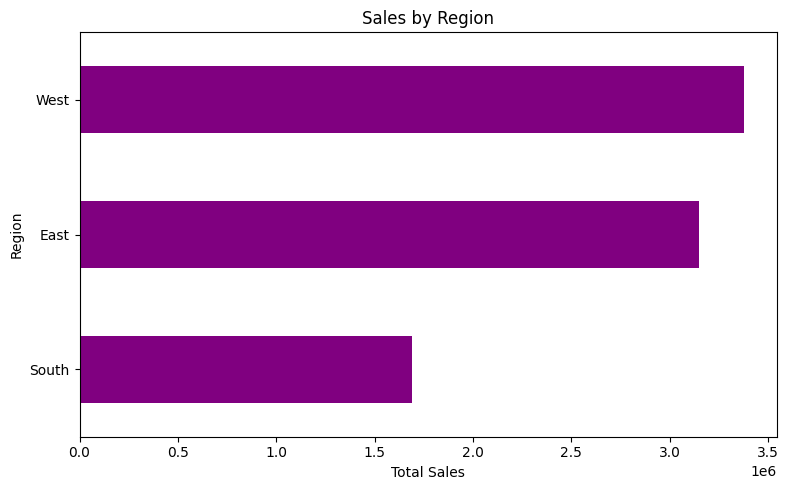

In [33]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8,5))
region_sales.plot(kind='barh', color='purple')
plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


# Conclusion

######
 Conclusion

Based on our retail sales analysis:

-  **Top-selling products** include high-value electronics like Laptops and Phones.
-  **Electronics** category generates the highest average price.
-  **Revenue peaks** during certain months, indicating seasonal trends.
-  **The West region** leads in total sales — highlighting regional performance differences.

This analysis showcases how Python and Pandas can be used in real business scenarios to extract data-driven insights from structured transactional data.

